In [1]:
import numpy as np 
import pandas as pd 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.utils import shuffle

from scipy.io import loadmat

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib import colormaps

from numpy.random import sample as sample


# Load MNIST data

In [2]:
mnist_train = loadmat('mnist/mnist_train.mat')
mnist_test = loadmat('mnist/mnist_test.mat')
X_train = mnist_train['train_X']
y_train = mnist_train['train_labels'].ravel()

y_train[y_train == 10] = 0 # I notice the labels have a value '10'. I update it to '0'
Xs, ys = shuffle(X_train, y_train, n_samples=1000, random_state=0) # Randomly selecting 1000 samples

In [3]:
df_mnist_train = pd.DataFrame(Xs)
df_mnist_train['label']=ys
print(df_mnist_train['label'].unique())

[1 4 0 2 7 6 5 9 8 3]


# Understanding the data

In [4]:
df_mnist_train.head(n=5) # List first five rows

0    1    2    3    4    5    6    7    8    9  ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  label  
0  0.0  0.0  0.0  0.0  0.0      1  
1  0.0  0.0  0.0  0.0  0.0      4  
2  0.0  0.0  0.0  0.0  0.0      0  
3  0.0  0.0  0.0  0.0  0.0      2  
4  0.0  0.0  0.0  0.0  0.0      7  
5  0.0  0.0  0.0  0.0  0.0      6  

[6 rows x 785 columns]

### Uncomment the relevant code lines below and execute to print more description about the data

In [5]:
# Information about the data

# df_mnist_train.info()

In [6]:
# Get the data shape

# df_mnist_train.shape

In [7]:
# List columns

# df_mnist_train.columns

In [8]:
# List counts

# df_mnist_train.count()

In [9]:
# Print basic statistics of the data

# df_mnist_train.describe()

In [10]:
# MNIST dataset has ten digits. 

# print(df_mnist_train['label'].unique())

# Plotting Functions

In [11]:
def scatter2d(X, y):
    fig, ax = plt.subplots(figsize=(15,10))
    colors = colormaps['tab10'].colors

    ax.scatter(X[:,0], X[:,1], c=y, alpha=0.5, cmap='tab10')

    # label a random sample of points
    points = len(y)*sample(100)
    for i in points.astype(int):
        ax.text(X[i,0], X[i,1], y[i], color=colors[int(y[i])], size=16, 
                path_effects=[pe.withStroke(linewidth=2, foreground="white")])
        
def scatter3d(X, y):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    colors = colormaps['tab10'].colors

    ax.mouse_init()
    ax.scatter(X[:,0], X[:,1], X[:,2], c=y, alpha=0.5, cmap='tab10')
    
    # label a random sample of points
    points = len(y)*sample(100)
    for i in points.astype(int):
        ax.text(X[i,0], X[i,1], X[i,2], y[i], color=colors[int(y[i])], size=16, 
                path_effects=[pe.withStroke(linewidth=2, foreground="white")])

# Principal Component Analysis

PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

Explained variance [5.11687301 3.74139084]
Explained variance ratio: [0.09704664 0.07095924]
Cumulative [0.09704664 0.16800588]


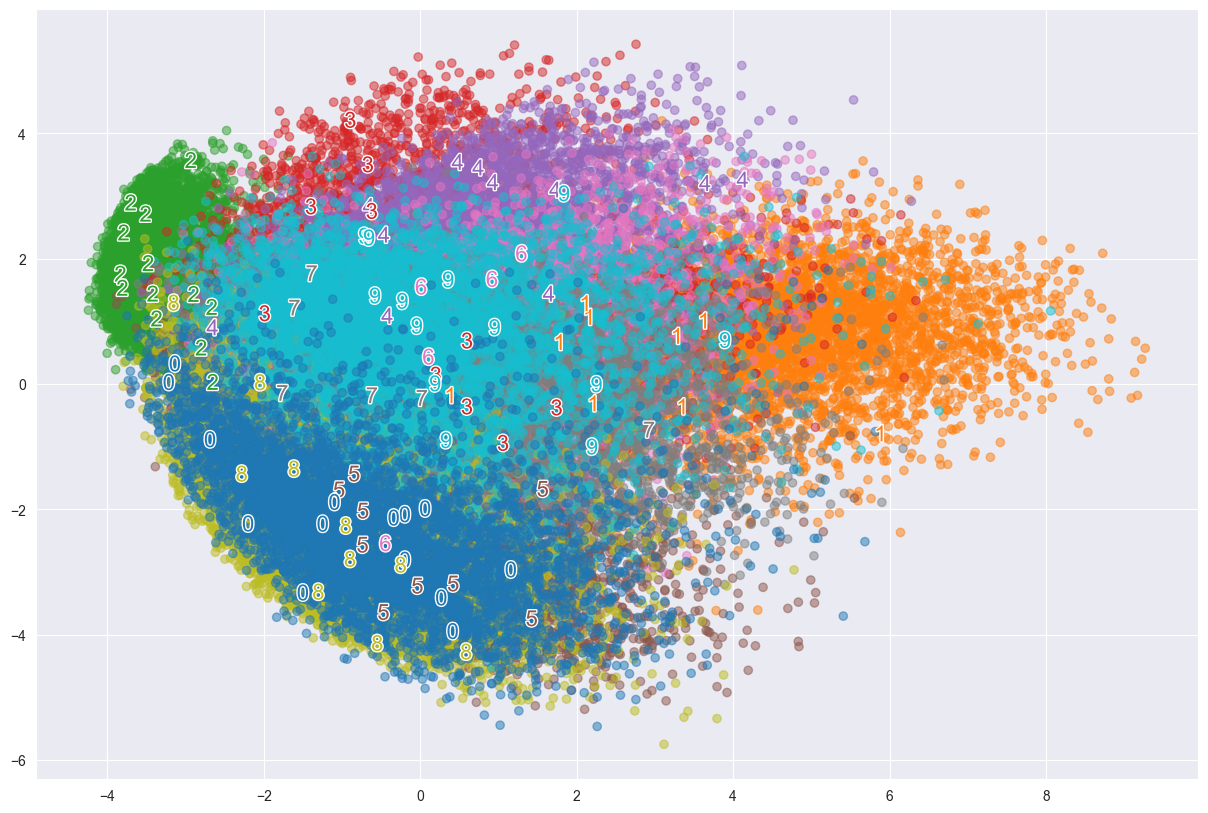

In [12]:
###
#Your code here. Try PCA with two components
###
pca = PCA(n_components = 2)
pca.fit(X_train)
X_r = pca.transform(X_train)
print('Explained variance', pca.explained_variance_) 
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Cumulative', pca.explained_variance_ratio_.cumsum())

scatter2d(X_r, y_train)

### To getter a better understanding of interaction of the dimensions plot the first three PCA dimensions

Explained variance [5.11687301 3.74139084 3.25270845]
Explained variance ratio: [0.09704664 0.07095924 0.06169089]
Cumulative [0.09704664 0.16800588 0.22969677]


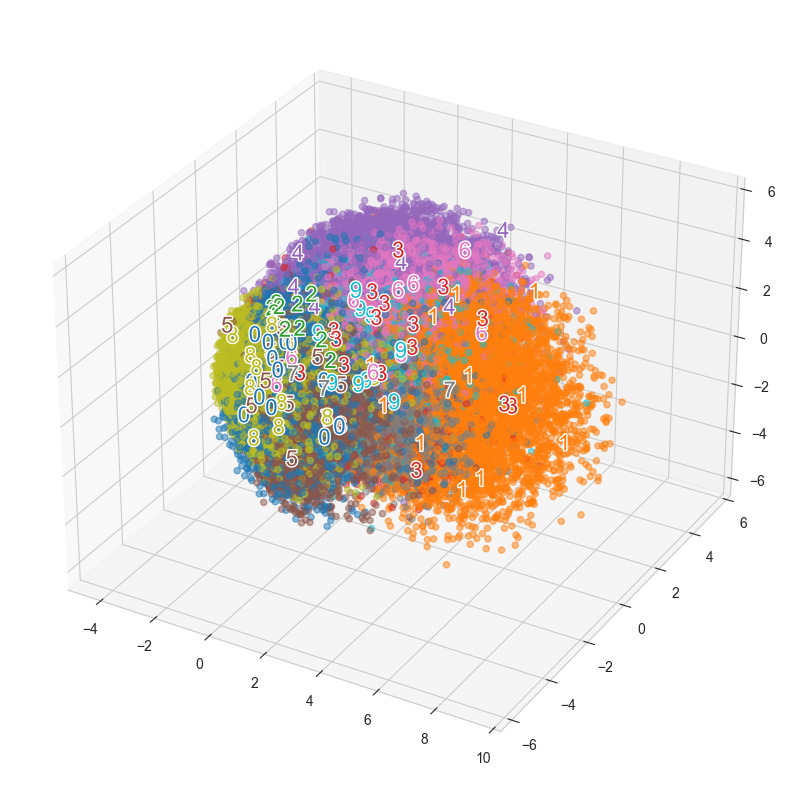

In [14]:
###
#Your code here. Try PCA with three components
###
pca = PCA(n_components = 3)
pca.fit(X_train)
X_r = pca.transform(X_train)
print('Explained variance', pca.explained_variance_) 
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Cumulative', pca.explained_variance_ratio_.cumsum())

scatter3d(X_r, y_train)

# t-SNE on the MNIST dataset

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#

In [15]:
###
#Your code here. Try t-SNE with two components
###
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
%time P = model.fit_transform(Xs)


CPU times: total: 3.69 s
Wall time: 1.78 s


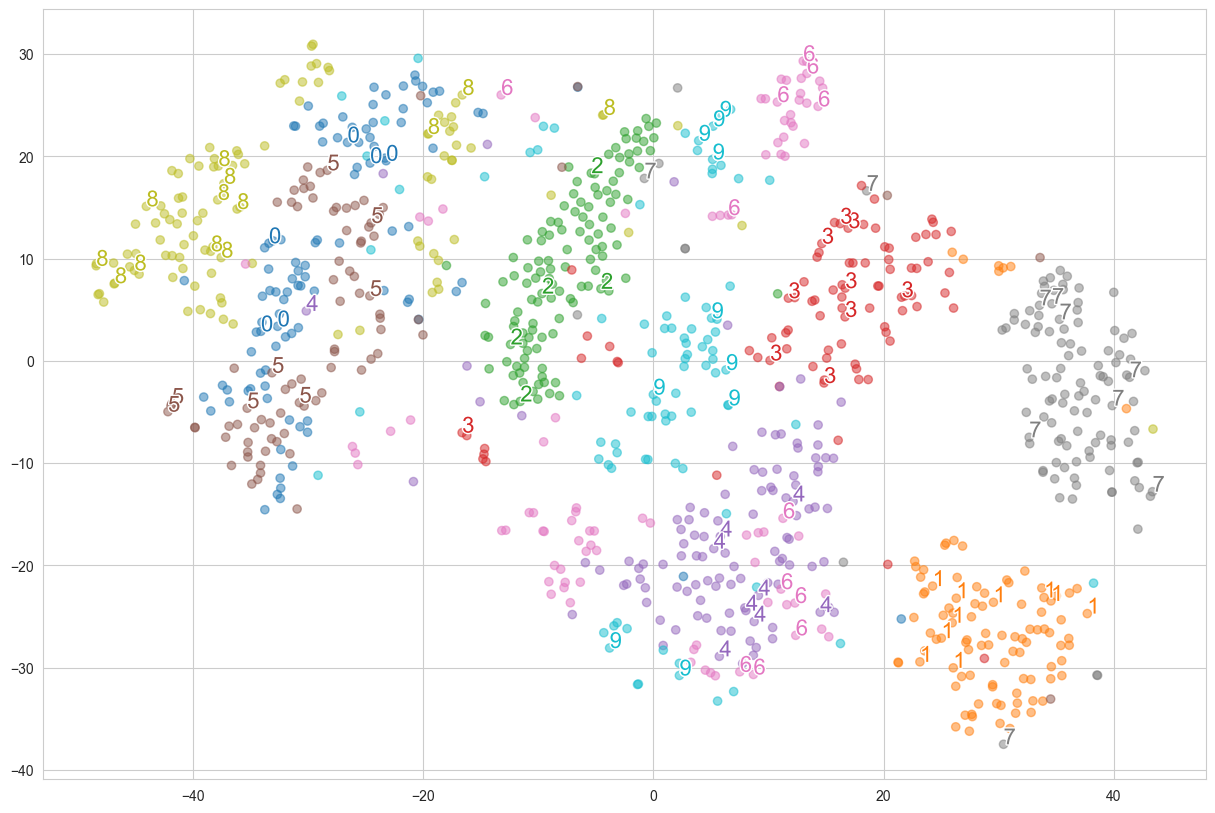

In [16]:
# Plot 2d
scatter2d(P, ys)

In [17]:
###
#Your code here. Try t-SNE with three components
###
model = TSNE(n_components=3, random_state=0)
np.set_printoptions(suppress=True)
%time P = model.fit_transform(Xs)

CPU times: total: 4.17 s
Wall time: 3.61 s


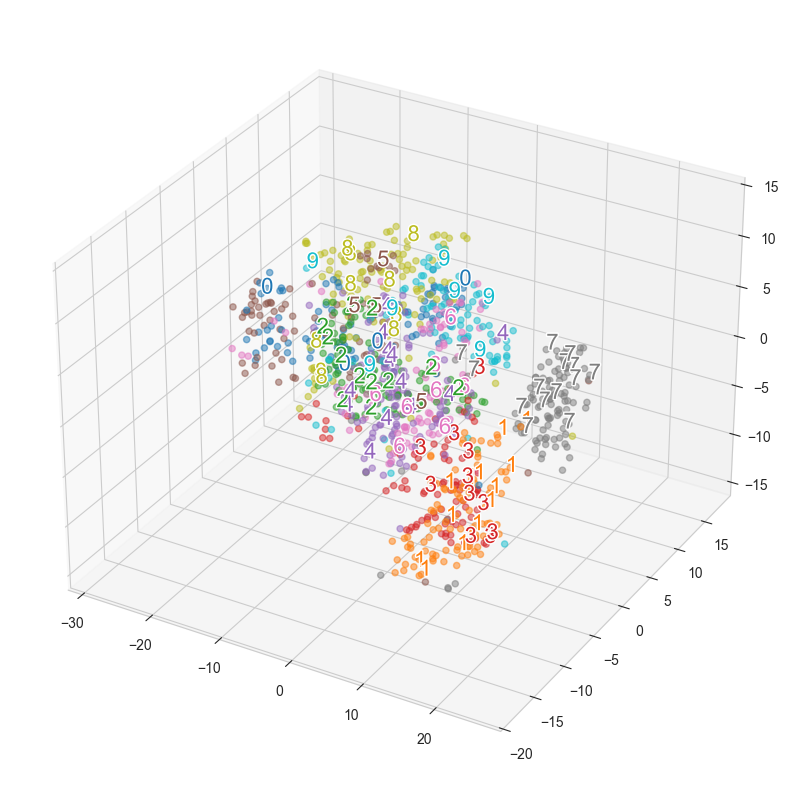

In [18]:
# Plot 3d
scatter3d(P, ys)

# Exploration Tasks

t-SNE offers others parameters including perplexity. The perplexity is related to the number of nearest neighbors that is used in the manifold learning algorithms. Try varying perplexity and observe the changes in the output

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#

CPU times: total: 1.97 s
Wall time: 1.29 s
CPU times: total: 1.98 s
Wall time: 2.02 s


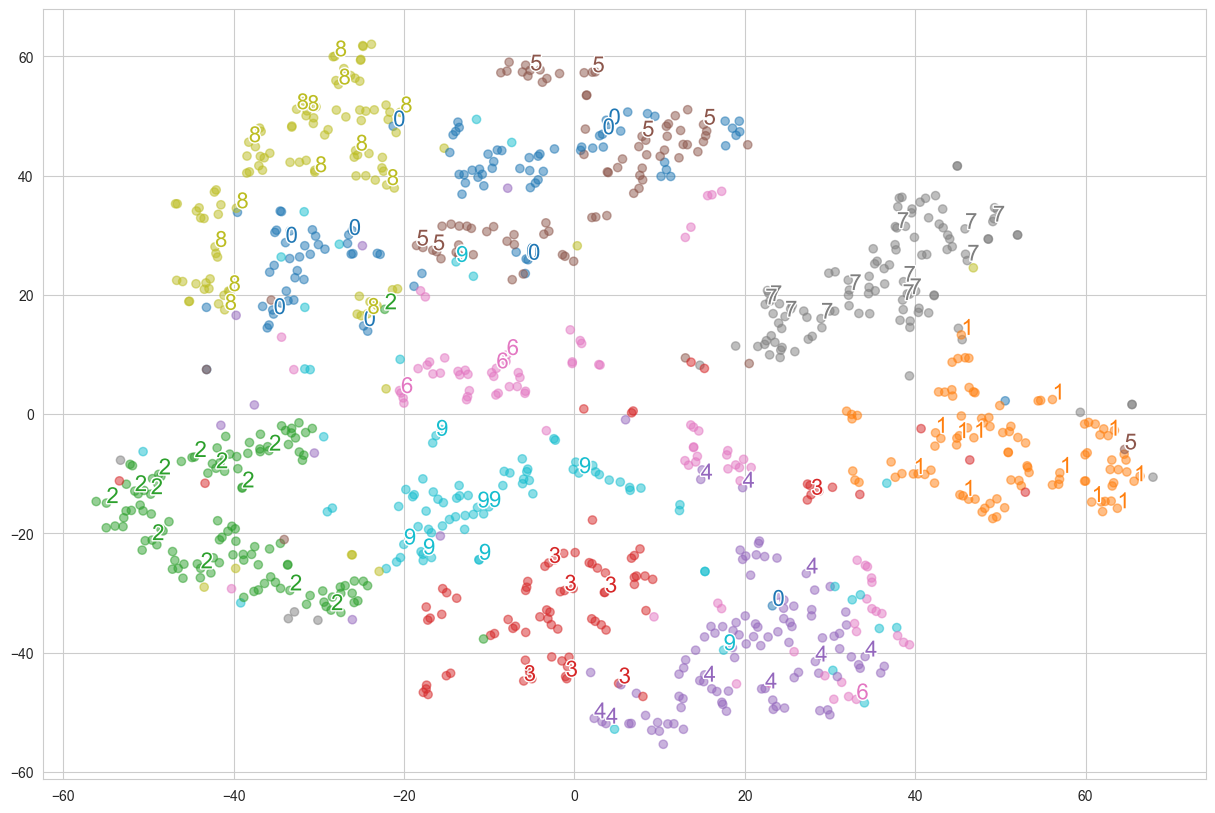

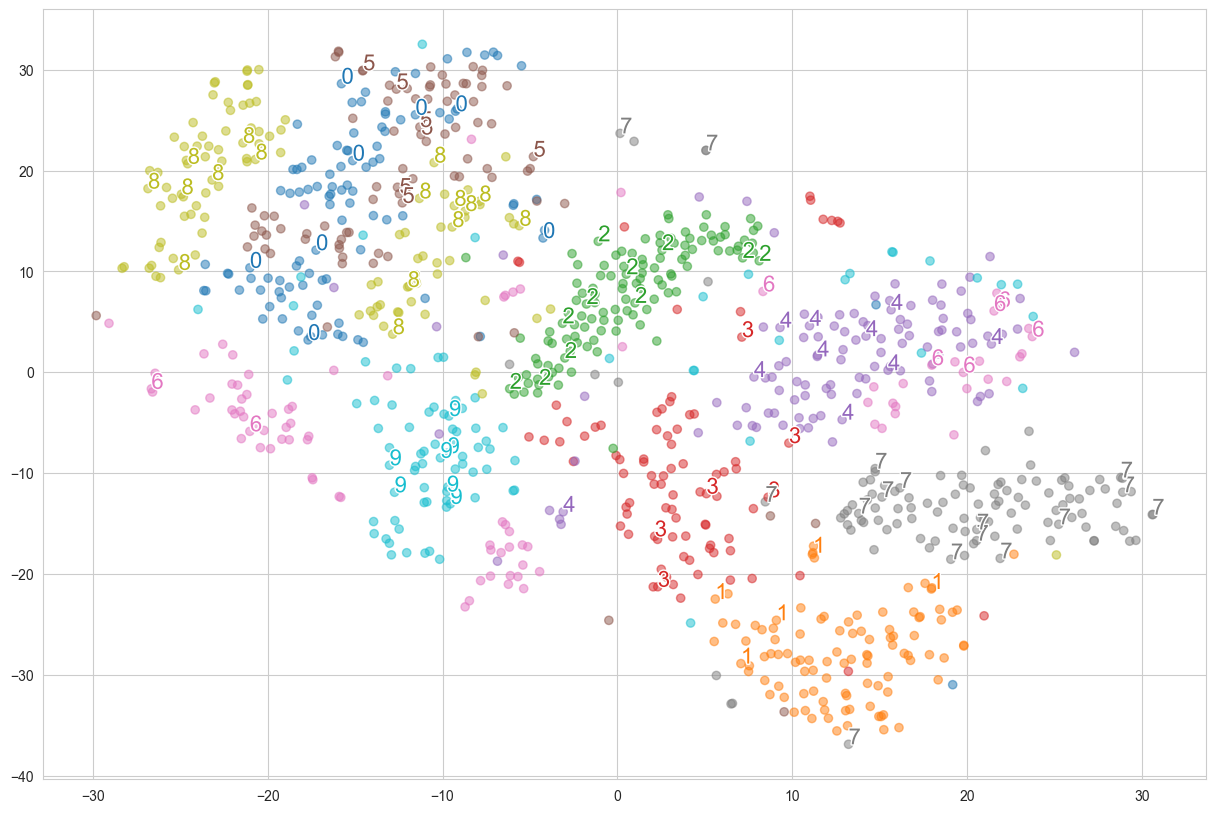

In [19]:
###
#Your code here
###

model = TSNE(n_components=2, random_state=0, perplexity=10)
np.set_printoptions(suppress=True)
%time P = model.fit_transform(Xs)

# Plot 2d
scatter2d(P, ys)

# Second attempt with higher perplexity
model = TSNE(n_components=2, random_state=0, perplexity=50)
np.set_printoptions(suppress=True)
%time P = model.fit_transform(Xs)

# Plot 2d
scatter2d(P, ys)

# UMAP

C:\Users\sb15704\OneDrive - University of Bristol\Python\Applied Data Science\Exploration\pythonProject\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


CPU times: total: 3.86 s
Wall time: 547 ms


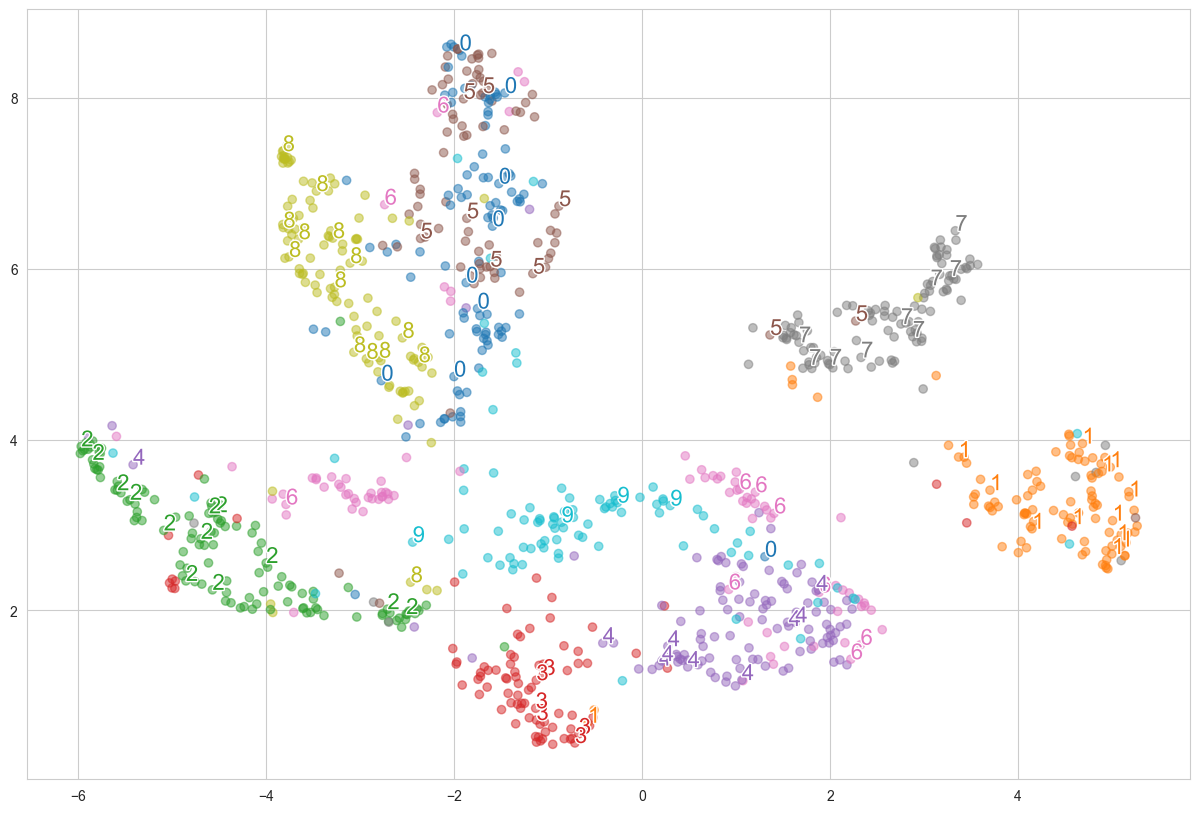

In [21]:
# Install umap-learn 
# Install from the terminal as conda install may not always work best from within notebook
# !conda install -c conda-forge umap-learn 
# Warning: There may be version incompatibility between umap and numpy versions greater than 2.1

###
#Your code here
###
#import umap               # install umap-learn to get this library
import umap.umap_ as umap  # or maybe import like this?
%time embed = umap.UMAP().fit_transform(Xs)
scatter2d(embed,ys)

# (triggers some warnings regarding package conflicts, etc. but does complete and plot the embedding)

# Random Projections

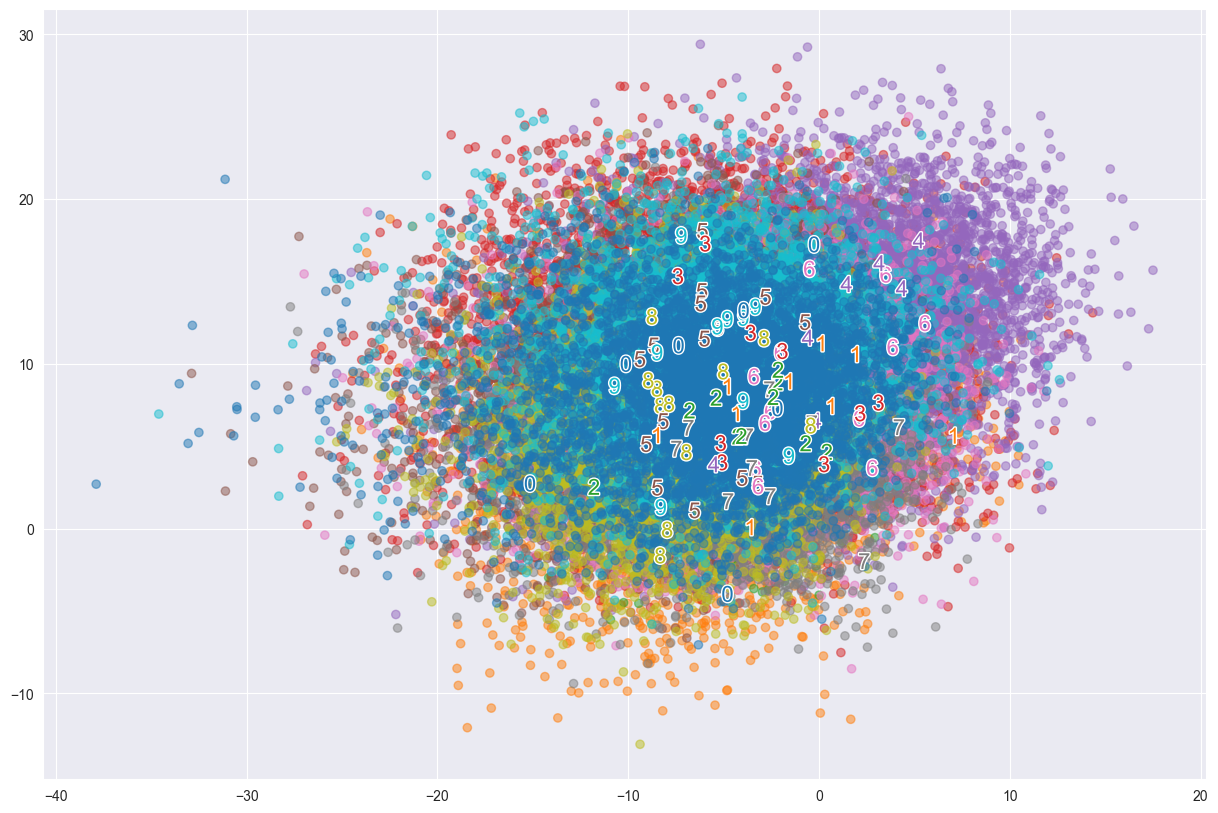

In [21]:
###
#Your code here
###
from sklearn import random_projection

min_dim = random_projection.johnson_lindenstrauss_min_dim(n_samples=X_train.shape[0],eps=0.9)
grp = random_projection.GaussianRandomProjection(n_components=2)

X_new = grp.fit_transform(X_train)

scatter2d(X_new,y_train)

# K-means Clustering with n=10  

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Plot 1. Predicted clusters
Plot 2. Actual clusters


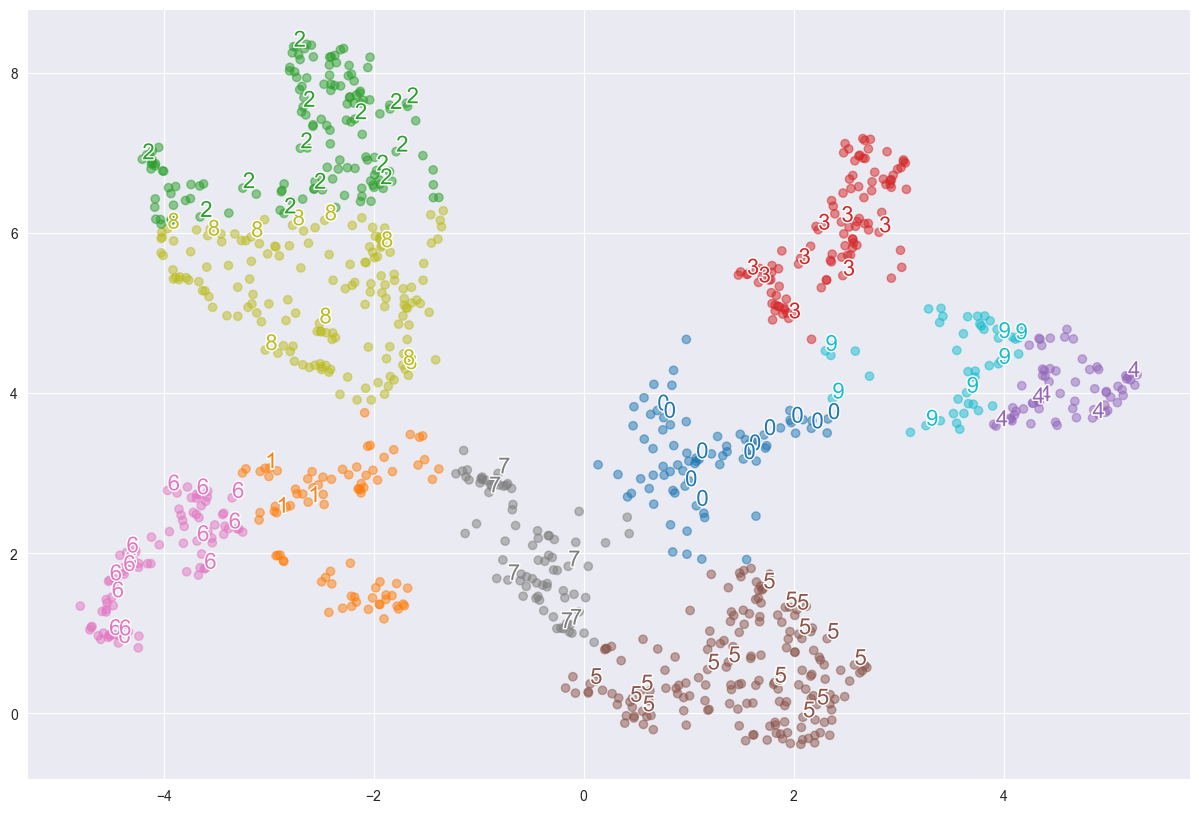

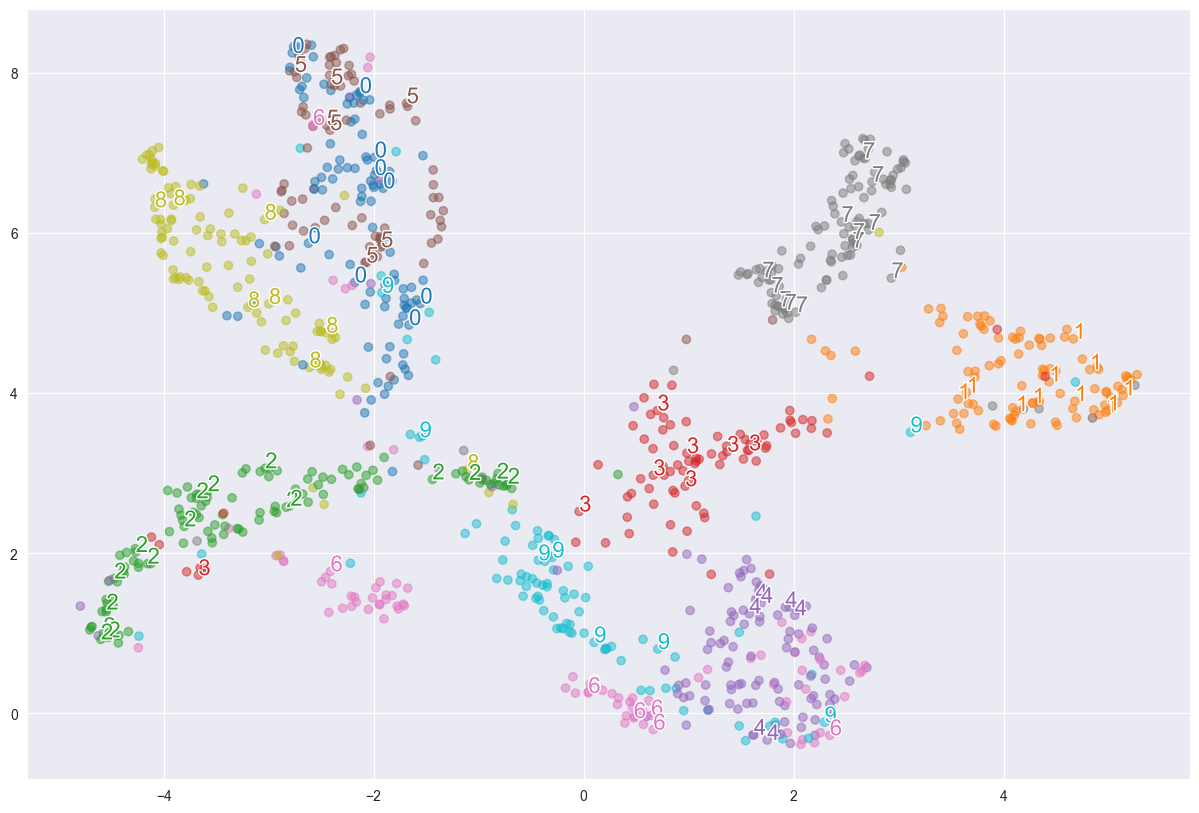

In [22]:
###
#Your code here
###

pred_ys = KMeans(n_clusters=10).fit_predict(embed)

print('Plot 1. Predicted clusters')
scatter2d(embed,pred_ys)

print('Plot 2. Actual clusters')
scatter2d(embed,ys)
